In [2]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 6.7 MB/s eta 0:00:00


In [3]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

In [4]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Create a list to append tweet data
tweets_list = []
maxTweets = 5000

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('crypto since:2020-01-01 until:{today}').get_items()):
    if i>maxTweets:
        break
    tweets_list.append([tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_to_df = pd.DataFrame(tweets_list, columns=['Tweets'])

In [7]:
tweets_to_df.head() #lists first five tweets

Tweets
0  Hi, @cryptocom and @kris. Why am I receiving a...
1  2/ AI is tech innovation, likely moving on an ...
2  "The US gov is so desperate for a win that the...
3  @KhaledElawadi @XRP_Avengers I was thinking th...
4  @eade_bengard @readDanwrite Never saw a tweet ...

In [8]:
#clean the tweets with a function

def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text

In [9]:
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet

In [10]:
tweets_to_df.head() #compares original tweets with cleaned Tweets

Tweets  \
0  Hi, @cryptocom and @kris. Why am I receiving a...   
1  2/ AI is tech innovation, likely moving on an ...   
2  "The US gov is so desperate for a win that the...   
3  @KhaledElawadi @XRP_Avengers I was thinking th...   
4  @eade_bengard @readDanwrite Never saw a tweet ...   

                                       cleanedTweets  
0  Hi,  and . Why am I receiving an error from pu...  
1  2/ AI is tech innovation, likely moving on an ...  
2  "The US gov is so desperate for a win that the...  
3    I was thinking that until today.  Think of t...  
4    Never saw a tweet from this person until tod...

In [11]:
tweets_to_df.to_csv('tweets_crypto.csv') #write dataframe into csv file

In [12]:
savedTweets = pd.read_csv('tweets_crypto.csv',index_col=0) #reads csv file


In [13]:
savedTweets.shape

(214, 2)

In [14]:
savedTweets 

Tweets  \
0    Hi, @cryptocom and @kris. Why am I receiving a...   
1    2/ AI is tech innovation, likely moving on an ...   
2    "The US gov is so desperate for a win that the...   
3    @KhaledElawadi @XRP_Avengers I was thinking th...   
4    @eade_bengard @readDanwrite Never saw a tweet ...   
..                                                 ...   
209  @CryptoGemsWorld #Bone is growing it's price, ...   
210  @Cryptofam3 #Bone is growing it's price, want ...   
211  @Cryptogems223 #Bone is growing it's price, wa...   
212  @tulioorocha_ #Bone is growing it's price, wan...   
213  @anaethereum @3402_eth @dr3a_eth @queengwei @M...   

                                         cleanedTweets  
0    Hi,  and . Why am I receiving an error from pu...  
1    2/ AI is tech innovation, likely moving on an ...  
2    "The US gov is so desperate for a win that the...  
3      I was thinking that until today.  Think of t...  
4      Never saw a tweet from this person until tod...  
..                                                 ...  
209   Bone is growing it's price, want you help to ...  
210   Bone is growing it's price, want you help to ...  
211   Bone is growing it's price, want you help to ...  
212   Bone is growing it's price, want you help to ...  
213           And I haven’t had a chance to formall...  

[214 rows x 2 columns]

In [15]:
#get subjectivity and polarity of tweets with a function

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)

In [16]:
savedTweets.drop('Tweets', axis=1).head() #shows polarity and subjectivity of each tweet and drops the uncleaned tweets column

cleanedTweets  Subjectivity  Polarity
0  Hi,  and . Why am I receiving an error from pu...      0.350000 -0.100000
1  2/ AI is tech innovation, likely moving on an ...      0.577273  0.043182
2  "The US gov is so desperate for a win that the...      0.472222 -0.113889
3    I was thinking that until today.  Think of t...      0.275000 -0.062500
4    Never saw a tweet from this person until tod...      0.300000  0.000000

In [17]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

In [18]:
savedTweets.drop('Tweets', axis=1).head()

cleanedTweets  Subjectivity  Polarity  \
0  Hi,  and . Why am I receiving an error from pu...      0.350000 -0.100000   
1  2/ AI is tech innovation, likely moving on an ...      0.577273  0.043182   
2  "The US gov is so desperate for a win that the...      0.472222 -0.113889   
3    I was thinking that until today.  Think of t...      0.275000 -0.062500   
4    Never saw a tweet from this person until tod...      0.300000  0.000000   

   Analysis  
0  Negative  
1  Positive  
2  Negative  
3  Negative  
4   Neutral

In [19]:
savedTweets[savedTweets['Analysis']=='Positive']

Tweets  \
1    2/ AI is tech innovation, likely moving on an ...   
8    @SirFinston @thetrip There are things outside ...   
9    Many of us had not heard the name Bitzlato unt...   
10   Congratulations to the DOJ for taking down Bit...   
11   @AltcoinDailyio To be fair, I doubt most circl...   
..                                                 ...   
209  @CryptoGemsWorld #Bone is growing it's price, ...   
210  @Cryptofam3 #Bone is growing it's price, want ...   
211  @Cryptogems223 #Bone is growing it's price, wa...   
212  @tulioorocha_ #Bone is growing it's price, wan...   
213  @anaethereum @3402_eth @dr3a_eth @queengwei @M...   

                                         cleanedTweets  Subjectivity  \
1    2/ AI is tech innovation, likely moving on an ...      0.577273   
8      There are things outside of crypto, I had no...      0.611111   
9    Many of us had not heard the name Bitzlato unt...      0.262963   
10   Congratulations to the DOJ for taking down Bit...      0.394444   
11    To be fair, I doubt most circles heard of Bit...      0.657143   
..                                                 ...           ...   
209   Bone is growing it's price, want you help to ...      0.750000   
210   Bone is growing it's price, want you help to ...      0.750000   
211   Bone is growing it's price, want you help to ...      0.750000   
212   Bone is growing it's price, want you help to ...      0.750000   
213           And I haven’t had a chance to formall...      0.400000   

     Polarity  Analysis  
1    0.043182  Positive  
8    0.193333  Positive  
9    0.114815  Positive  
10   0.172222  Positive  
11   0.471429  Positive  
..        ...       ...  
209  0.250000  Positive  
210  0.250000  Positive  
211  0.250000  Positive  
212  0.250000  Positive  
213  0.345000  Positive  

[135 rows x 5 columns]

In [20]:
savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity

Positive    135
Negative     44
Neutral      35
Name: Analysis, dtype: int64

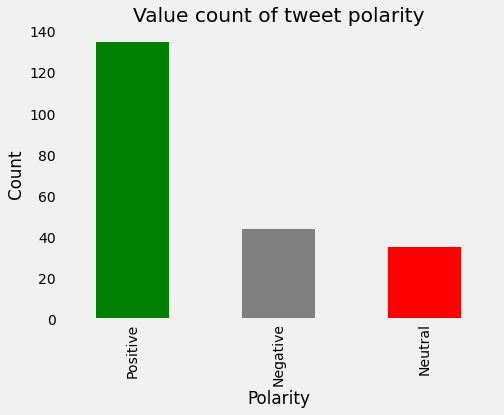

In [21]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
#xlabel = ['Positive','Negative','Neutral']
#plt.bar(xlabel,savedTweets['Analysis'].value_counts(), color = color)
color = ['green','grey','red']
savedTweets['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of polarity')

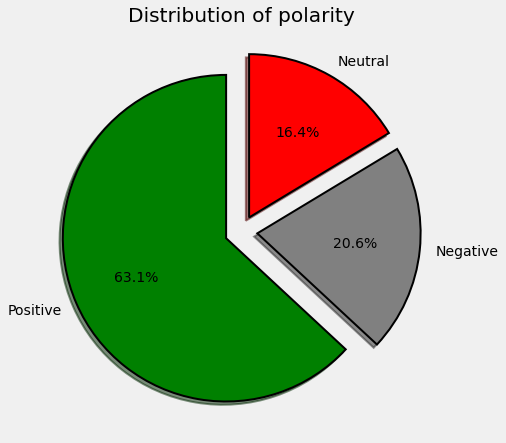

In [22]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=savedTweets['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

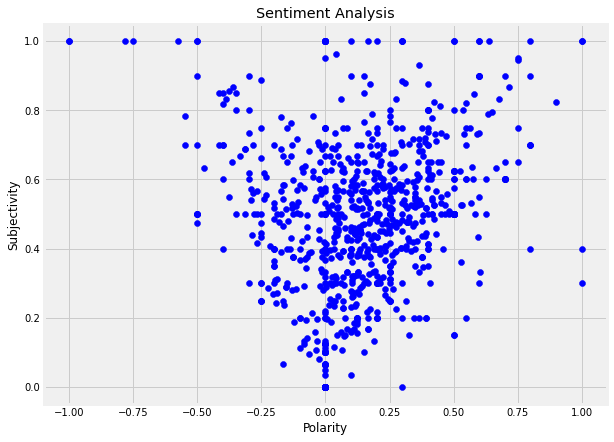

In [ ]:
#plot the polarity and subjectivity on a scatter plot
plt.figure(figsize=(9,7))
for i in range(0,savedTweets.shape[0]):
    plt.scatter(savedTweets['Polarity'][i],savedTweets['Subjectivity'][i], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#create a function for wordcloud
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()

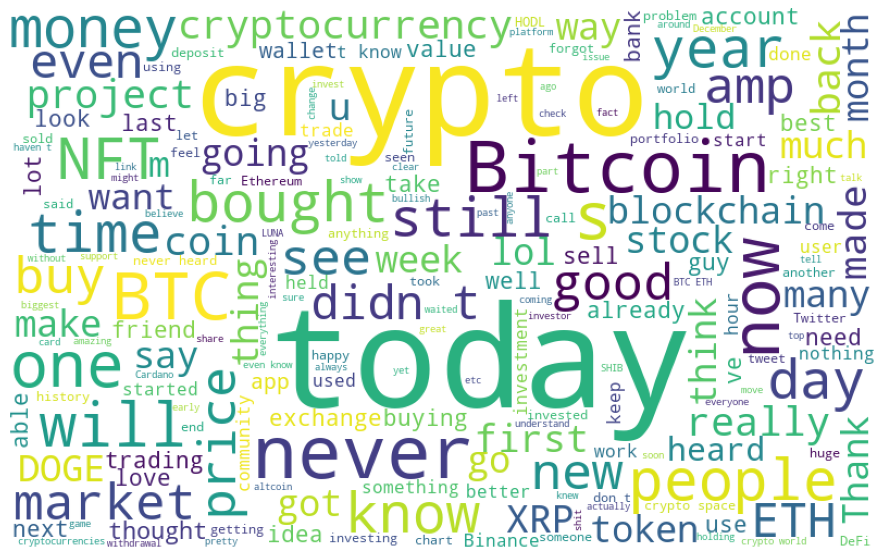

In [ ]:
#plot wordcloud for all tweets
allTweets = savedTweets['cleanedTweets']
create_wordcloud(allTweets)

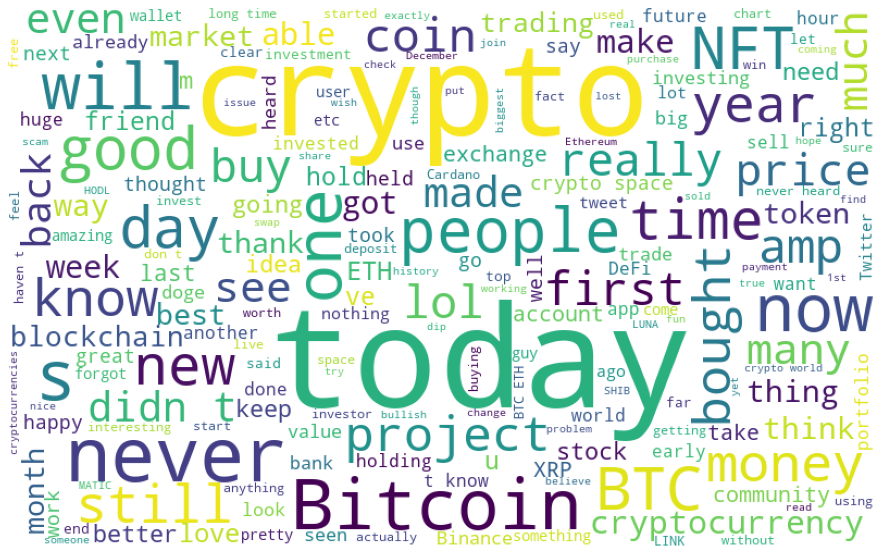

In [ ]:
#create wordcloud for positive tweets
posTweets = savedTweets.loc[savedTweets['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)
    

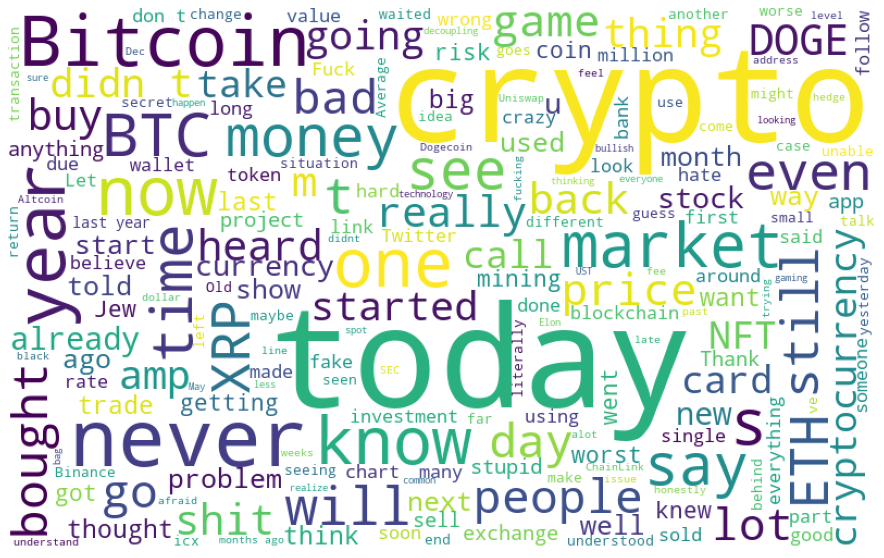

In [ ]:
#plot wordcloud for negative tweets
negTweets = savedTweets.loc[savedTweets['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)

In [ ]:
savedTweets.shape[0] #shows total rows of tweets

987

In [ ]:
# get the percentage of positive tweets
pTweets = savedTweets[savedTweets['Analysis']=='Positive']
pTweets = pTweets['cleanedTweets']
percentage = round((pTweets.shape[0]/savedTweets.shape[0]) *100,1)
print('Percentage of positive tweets: {0}%'.format(percentage))


Percentage of positive tweets: 60.3%


In [ ]:
# get the percentage of negative tweets
nTweets = savedTweets[savedTweets['Analysis']=='Negative']
nTweets = nTweets['cleanedTweets']
percentage = round((nTweets.shape[0]/savedTweets.shape[0]) *100,1)
print('Percentage of negative tweets: {0}%'.format(percentage))

Percentage of negative tweets: 18.8%


In [ ]:
#break each tweet sentence into words
sentences = []
for word in savedTweets['cleanedTweets']:
    sentences.append(word)
sentences

lines = list()
for line in sentences:
    words = line.split()
    for w in words:
        lines.append(w)
lines[:10]

['If',
 'we',
 'hold',
 'current',
 'level',
 'on',
 'BTC',
 'until',
 "today's",
 'closure']

In [ ]:
#stemming all the words to their root word
stemmer = SnowballStemmer(language='english')
stem=[]
for word in lines:
    stem.append(stemmer.stem(word))
stem[:20]


['if',
 'we',
 'hold',
 'current',
 'level',
 'on',
 'btc',
 'until',
 'today',
 'closur',
 'i',
 'expect',
 'someth',
 'like',
 'this',
 'for',
 'the',
 'next',
 'two',
 'months.']

In [ ]:
#removes stopwords (very common words in a sentence)
stem2 = []
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
#stem2[:20]

In [ ]:
#creates a new dataframe for the stem
df = pd.DataFrame(stem2)
df=df[0].value_counts()
df

crypto           771
today            464
today.           326
today,           146
bitcoin          113
                ... 
ubisoft...th       1
shift.             1
crypto-betray      1
guis               1
prediction.        1
Name: 0, Length: 5731, dtype: int64

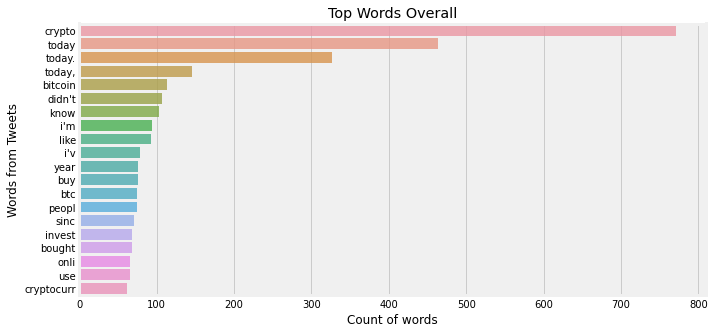

In [ ]:
#plots the top 20 used words
df = df[:20]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.xlabel('Count of words', fontsize=12)
plt.ylabel('Words from Tweets', fontsize=12)
plt.show()